In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
cc_data=pd.read_csv('Credit Score Classification Dataset.csv')

In [ ]:
cc_data.head()


Age  Gender  Income            Education Marital Status  \
0   25  Female   50000    Bachelor's Degree         Single   
1   30    Male  100000      Master's Degree        Married   
2   35  Female   75000            Doctorate        Married   
3   40    Male  125000  High School Diploma         Single   
4   45  Female  100000    Bachelor's Degree        Married   

   Number of Children Home Ownership Credit Score  
0                   0         Rented         High  
1                   2          Owned         High  
2                   1          Owned         High  
3                   0          Owned         High  
4                   3          Owned         High

In [ ]:
!pip install -q autoviz
!pip install -q -U --pre pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.9/67.9 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.7/353.7 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 67.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 89.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 64.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.9/84.9 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.6/483.6 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.0/150.0 kB 13.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
cc_data.tail(5)

Age  Gender  Income            Education Marital Status  \
159   29  Female   27500  High School Diploma         Single   
160   34    Male   47500   Associate's Degree         Single   
161   39  Female   62500    Bachelor's Degree        Married   
162   44    Male   87500      Master's Degree         Single   
163   49  Female   77500            Doctorate        Married   

     Number of Children Home Ownership Credit Score  
159                   0         Rented          Low  
160                   0         Rented      Average  
161                   2          Owned         High  
162                   0          Owned         High  
163                   1          Owned         High

In [ ]:
cc_data.nunique()

Age                   29
Gender                 2
Income                52
Education              5
Marital Status         2
Number of Children     4
Home Ownership         2
Credit Score           3
dtype: int64

In [ ]:
cc_data.dtypes

Age                    int64
Gender                object
Income                 int64
Education             object
Marital Status        object
Number of Children     int64
Home Ownership        object
Credit Score          object
dtype: object

In [ ]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [ ]:
cc_data.describe()

Age         Income  Number of Children
count  164.000000     164.000000          164.000000
mean    37.975610   83765.243902            0.652439
std      8.477289   32457.306728            0.883346
min     25.000000   25000.000000            0.000000
25%     30.750000   57500.000000            0.000000
50%     37.000000   83750.000000            0.000000
75%     45.000000  105000.000000            1.000000
max     53.000000  162500.000000            3.000000

In [ ]:
cc_data.isna().any()

Age                   False
Gender                False
Income                False
Education             False
Marital Status        False
Number of Children    False
Home Ownership        False
Credit Score          False
dtype: bool

In [ ]:
cc_data.isna().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

In [ ]:
cc_data.columns

Index(['Age', 'Gender', 'Income', 'Education', 'Marital Status',
       'Number of Children', 'Home Ownership', 'Credit Score'],
      dtype='object')

In [ ]:
cat_col=cc_data.select_dtypes(include=['object']).columns.tolist()
cat_col

['Gender', 'Education', 'Marital Status', 'Home Ownership', 'Credit Score']

In [ ]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
for i in cat_col:
  
  le.fit(cc_data[i])

  cc_data[i]=le.transform(cc_data[i])

  cat_cols=cc_data.select_dtypes(include=['object']).columns.tolist()
  cat_cols

In [ ]:
cc_data.corr()


Age    Gender    Income  Education  Marital Status  \
Age                 1.000000  0.235343  0.699464   0.170254       -0.517723   
Gender              0.235343  1.000000  0.495738   0.248671        0.278362   
Income              0.699464  0.495738  1.000000   0.369449       -0.471004   
Education           0.170254  0.248671  0.369449   1.000000       -0.067797   
Marital Status     -0.517723  0.278362 -0.471004  -0.067797        1.000000   
Number of Children  0.055390 -0.442139  0.084547   0.047311       -0.696984   
Home Ownership     -0.713803 -0.031519 -0.704928  -0.397043        0.708374   
Credit Score        0.205362 -0.247729  0.083698   0.334424       -0.205756   

                    Number of Children  Home Ownership  Credit Score  
Age                           0.055390       -0.713803      0.205362  
Gender                       -0.442139       -0.031519     -0.247729  
Income                        0.084547       -0.704928      0.083698  
Education                     0.047311       -0.397043      0.334424  
Marital Status               -0.696984        0.708374     -0.205756  
Number of Children            1.000000       -0.497129      0.136517  
Home Ownership               -0.497129        1.000000     -0.293384  
Credit Score                  0.136517       -0.293384      1.000000

<Axes: >

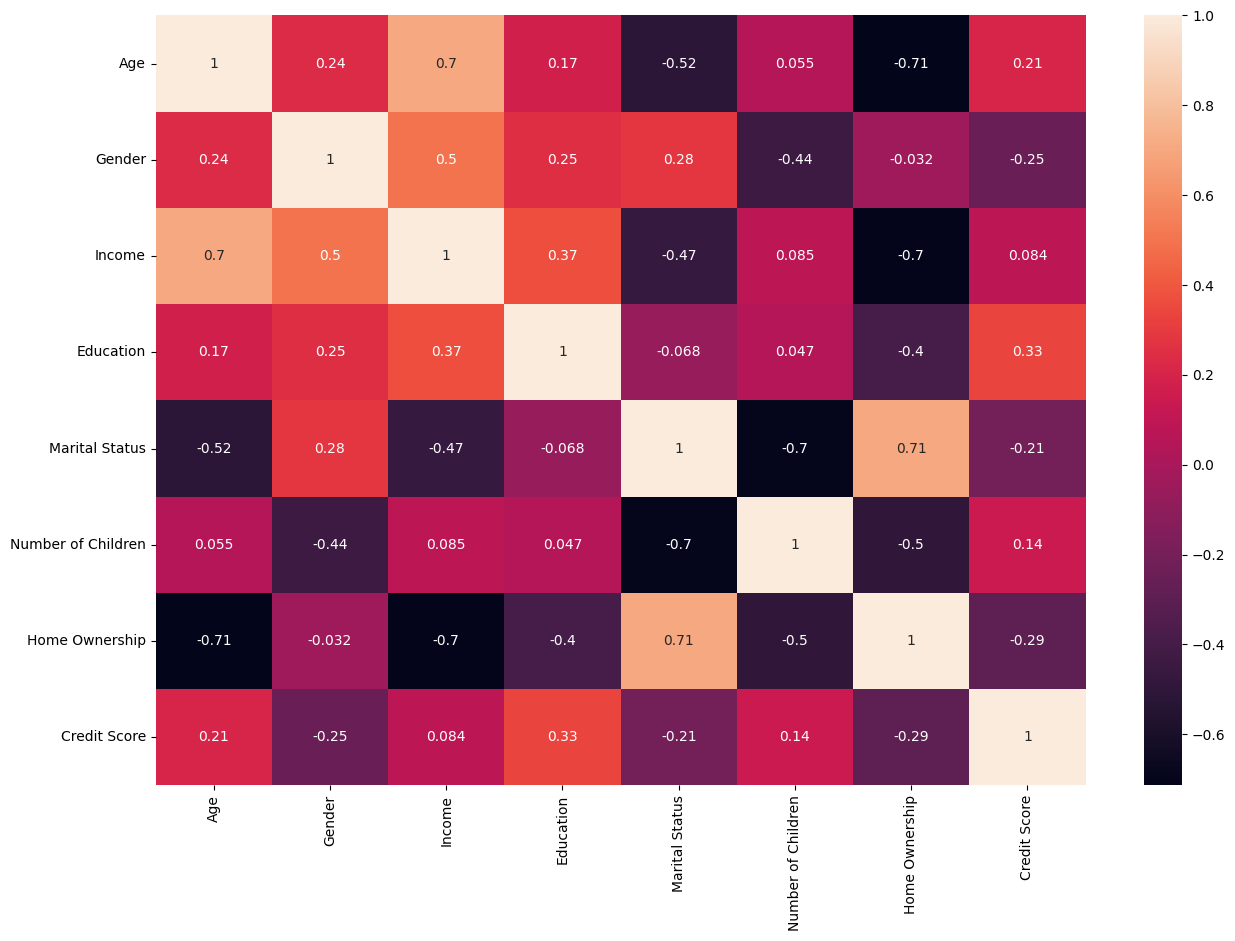

In [ ]:
plt.figure(figsize=(15,10))

sns.heatmap(cc_data.corr(),annot=True)

In [ ]:
class_counts=cc_data['Credit Score'].value_counts()

class_counts

1    113
0     36
2     15
Name: Credit Score, dtype: int64

In [ ]:
x=cc_data.drop('Credit Score', axis=1)
y=cc_data['Credit Score']

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
159    2
160    0
161    1
162    1
163    1
Name: Credit Score, Length: 164, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=42)

X_train_res, Y_train_res = sm.fit_resample(X_train,Y_train)

print('Classification befor sampling:' , Y_train.value_counts())
print('Classification after sampling:' , Y_train_res.value_counts())

Classification befor sampling: 1    90
0    31
2    10
Name: Credit Score, dtype: int64
Classification after sampling: 1    90
0    90
2    90
Name: Credit Score, dtype: int64


In [ ]:
from autoviz.classify_method import data_cleaning_suggestions,data_suggestions
from pycaret import classification
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix

data_cleaning_suggestions(cc_data)

Imported v0.1.604. After importing, execute '%matplotlib inline' to display charts in Jupyter.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Update: verbose=0 displays charts in your local Jupyter notebook.
        verbose=1 additionally provides EDA data cleaning suggestions. It also displays charts.
        verbose=2 does not display charts but saves them in AutoViz_Plots folder in local machine.
        chart_format='bokeh' displays charts in your local Jupyter notebook.
        chart_format='server' displays charts in your browser: one tab for each chart type
        chart_format='html' silently saves interactive HTML files in your local machine
Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


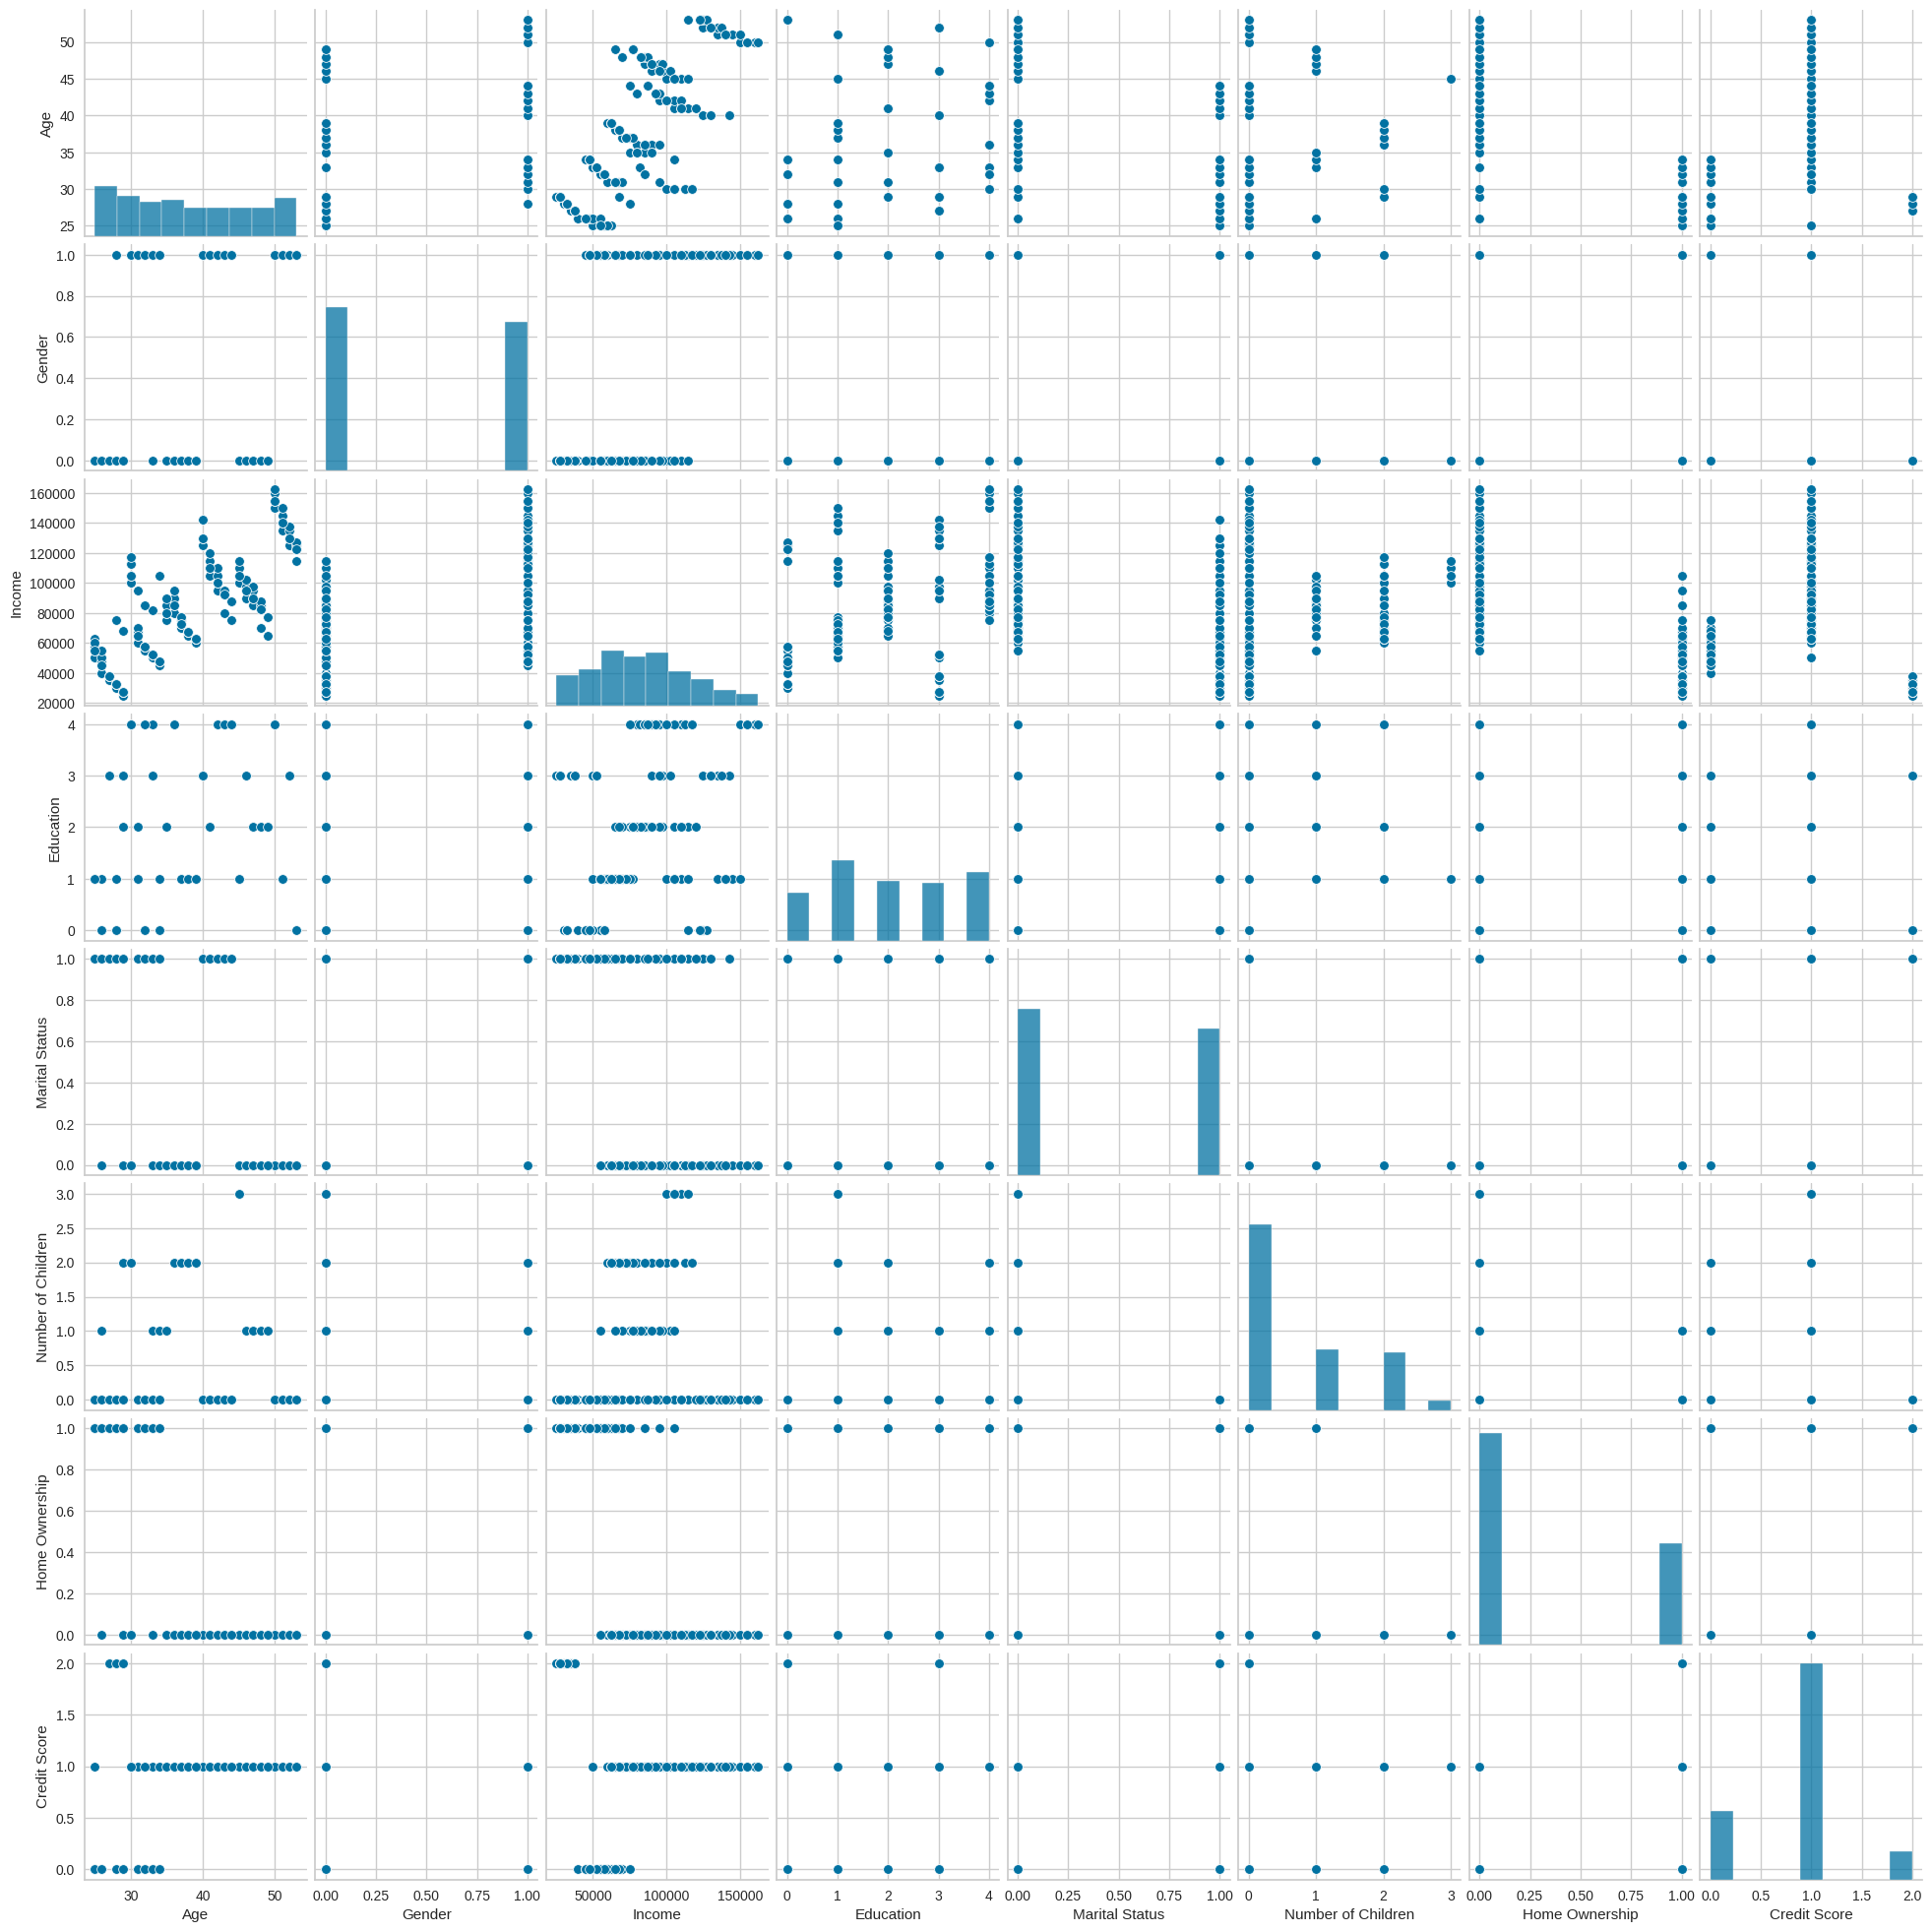

In [ ]:
sns.pairplot(cc_data)

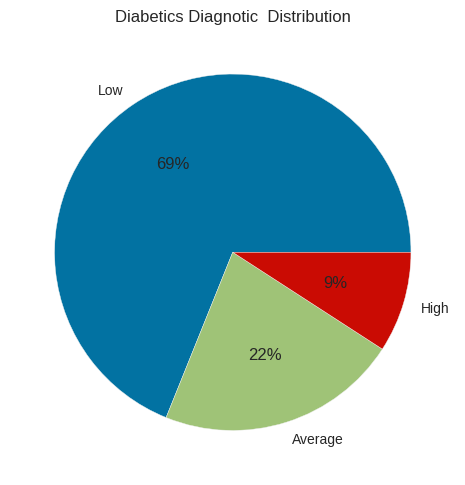

In [ ]:
  class_counts=cc_data['Credit Score'].value_counts()

  labels=["Low","Average","High"]

  value=class_counts.values

  plt.pie(value,labels=labels,autopct="%1.0f%%")

  plt.title("Diabetics Diagnotic  Distribution")

  plt.show()

<Axes: >

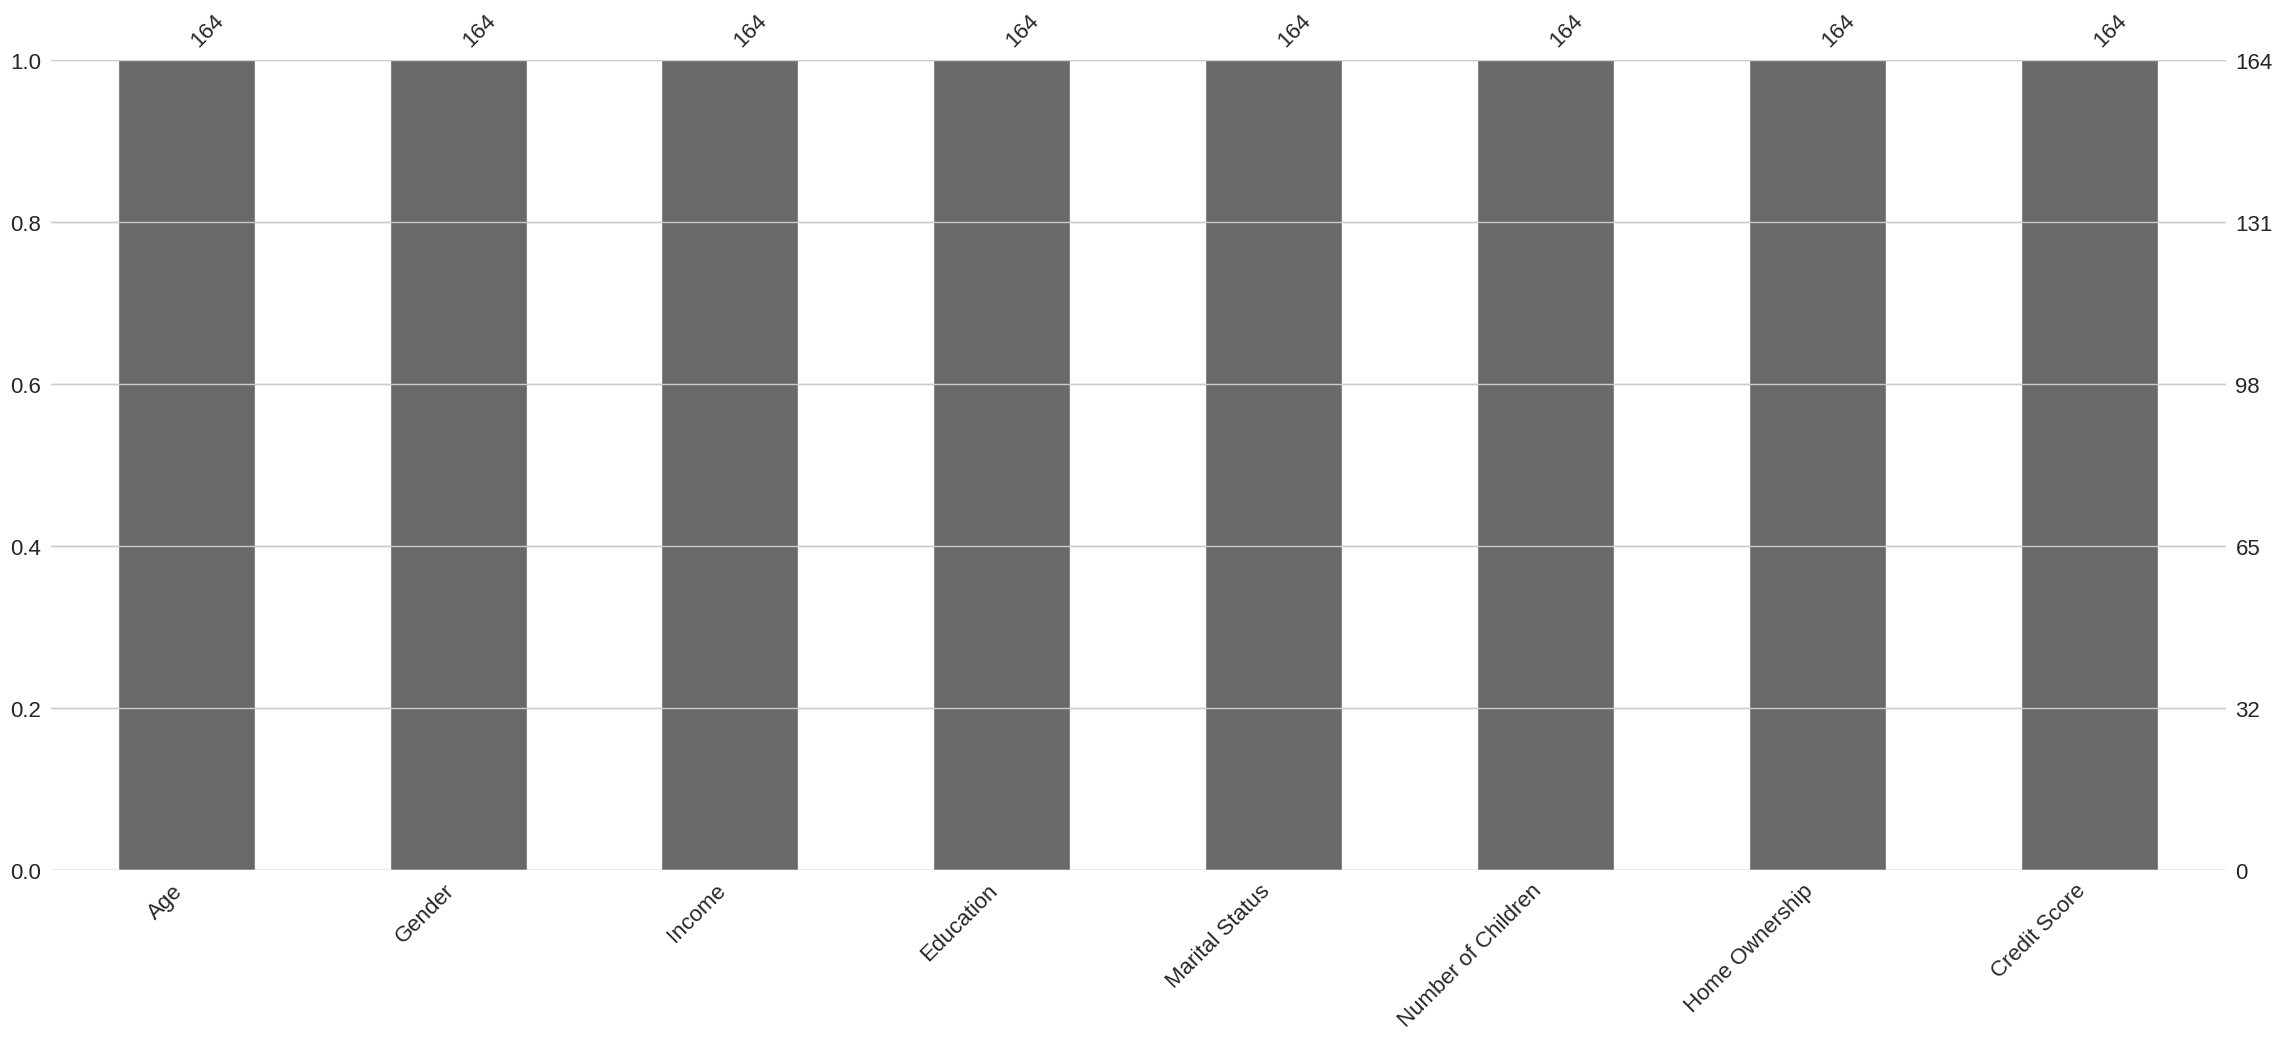

In [ ]:
import missingno as msno

msno.bar(cc_data)

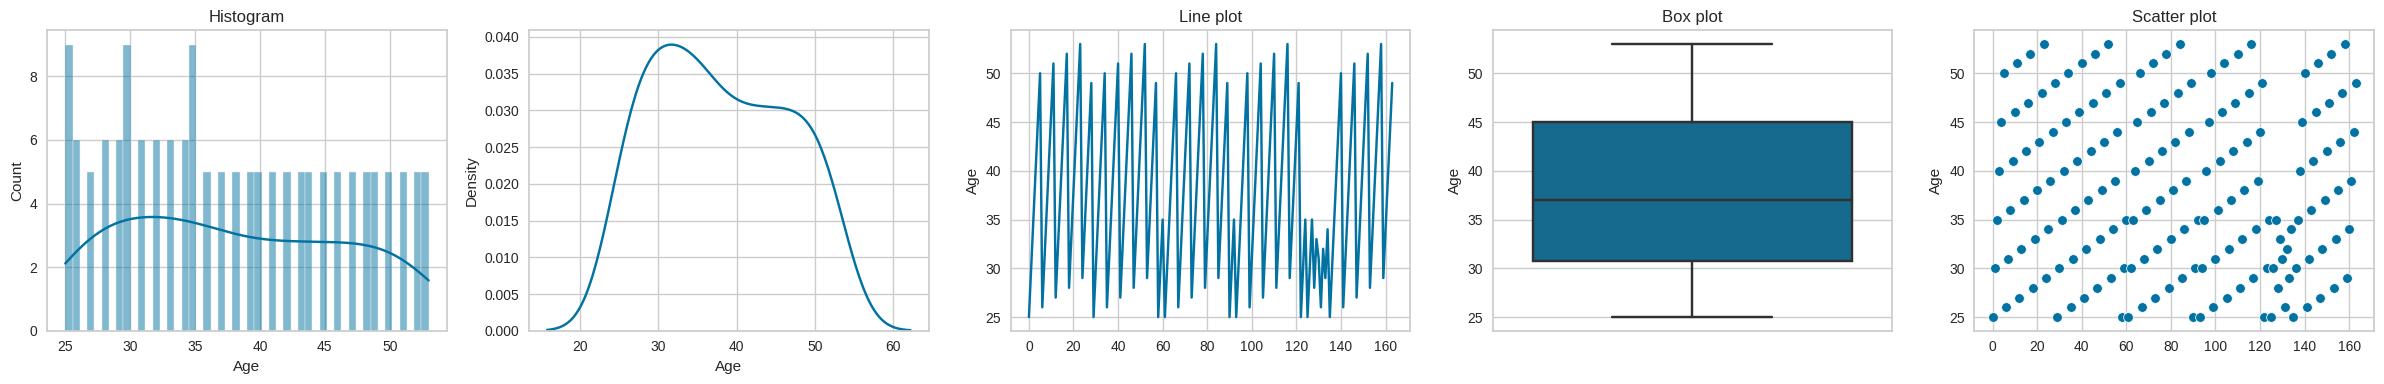

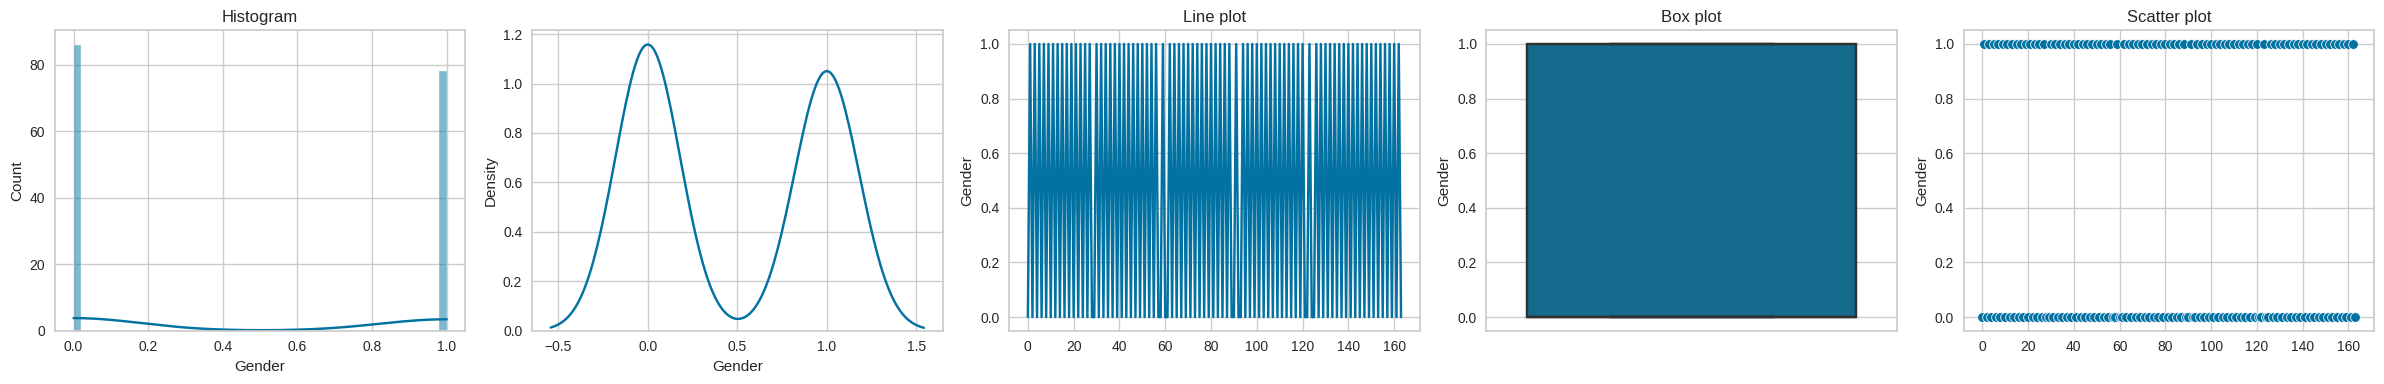

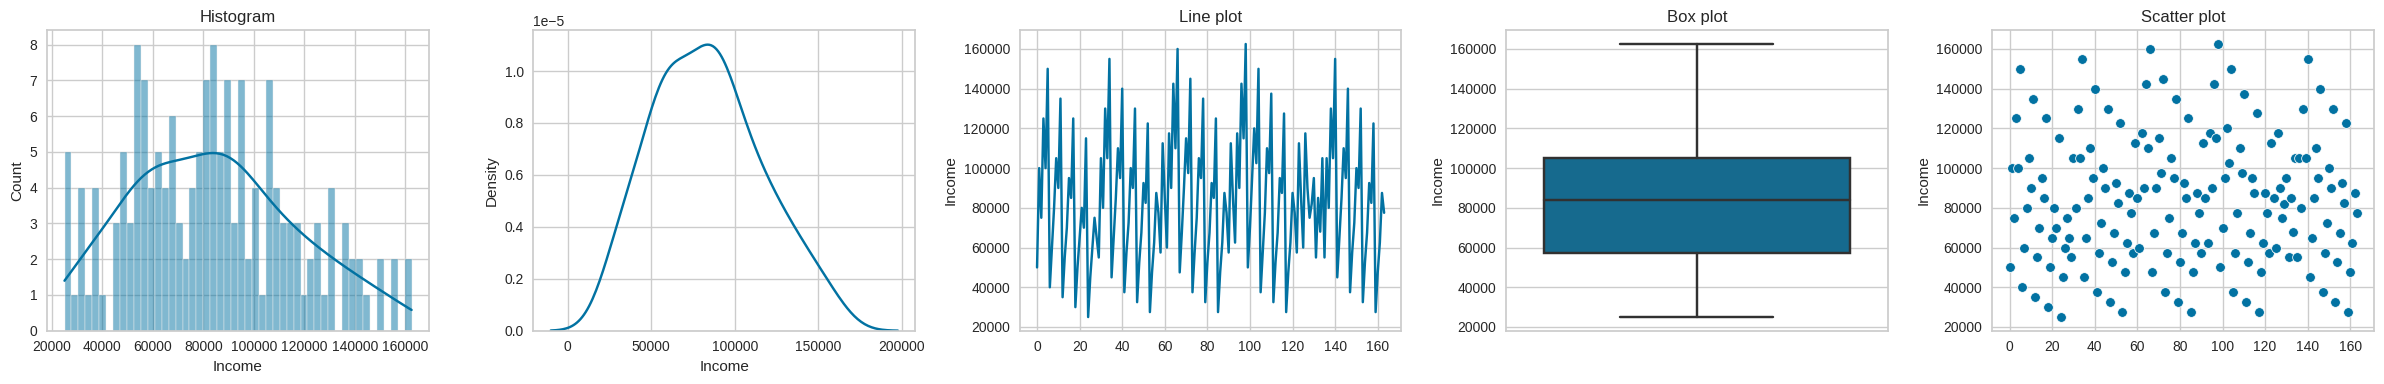

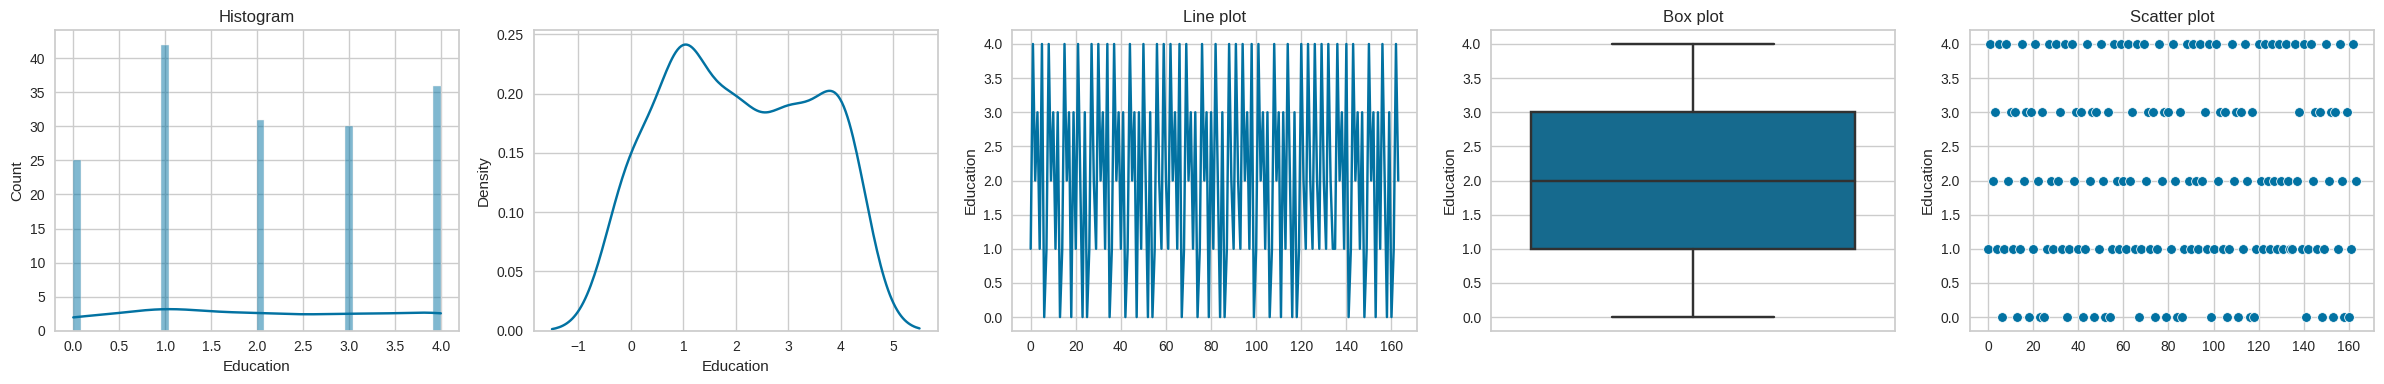

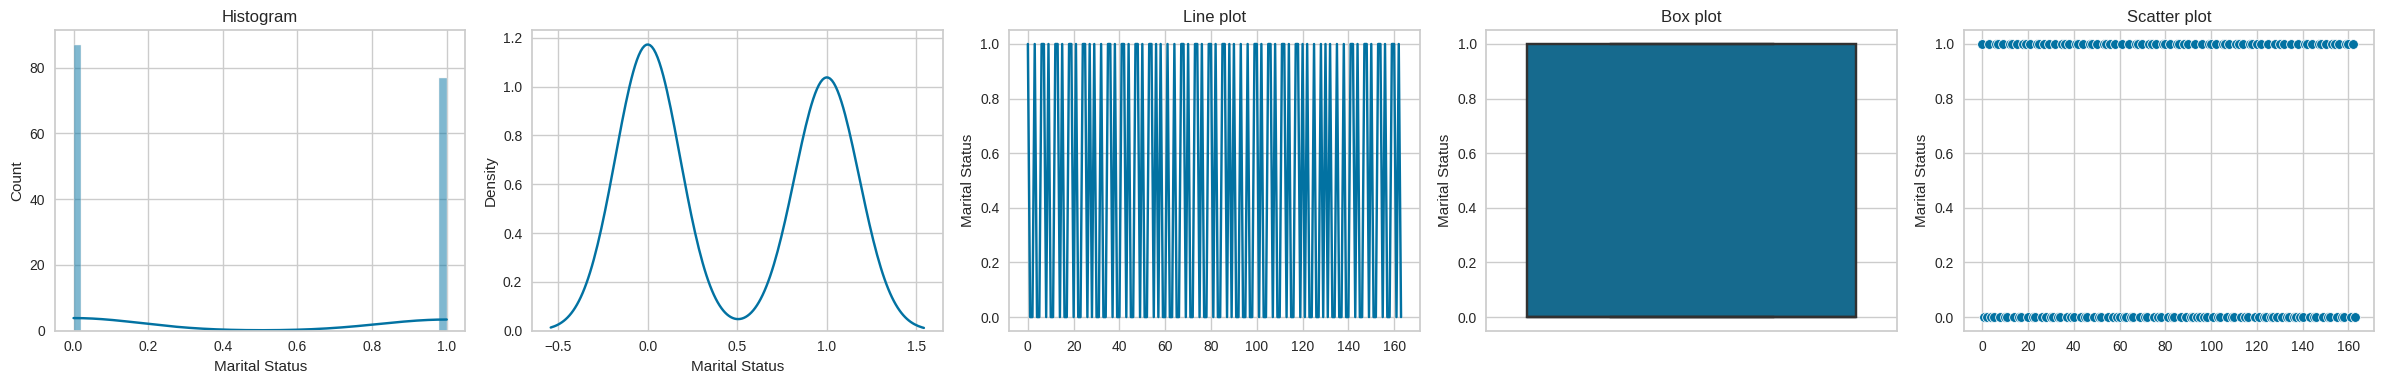

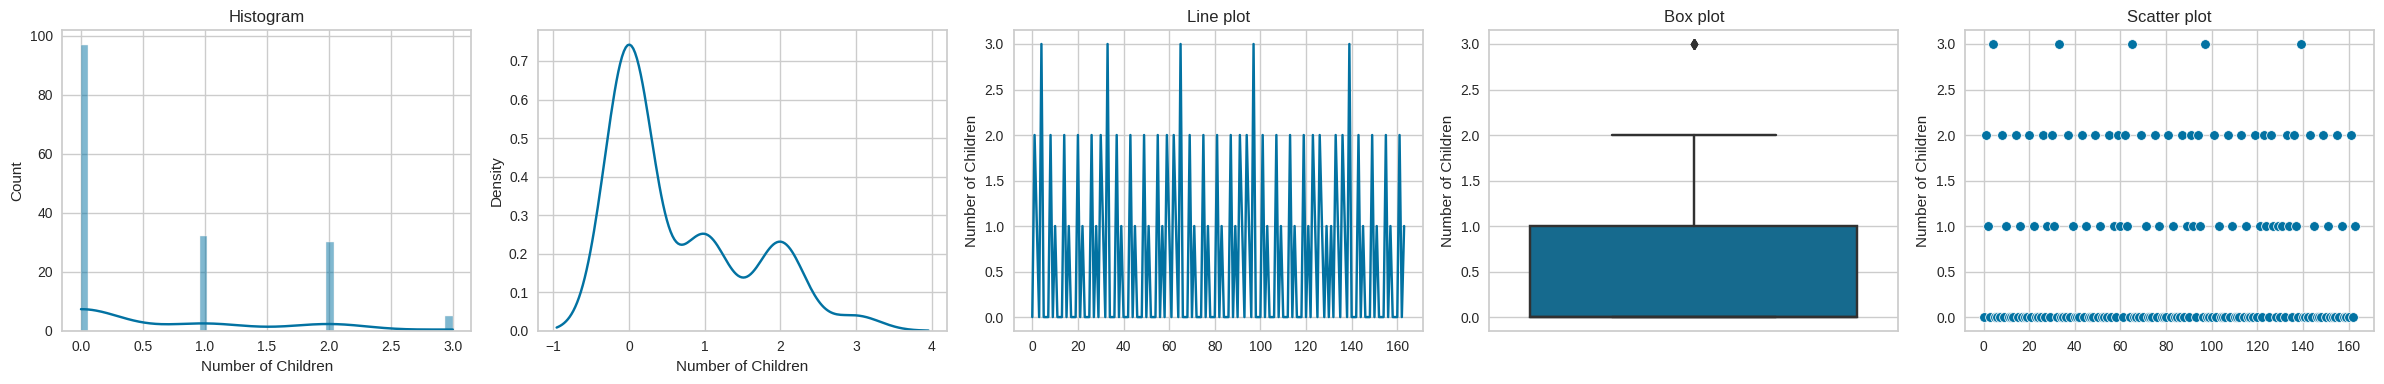

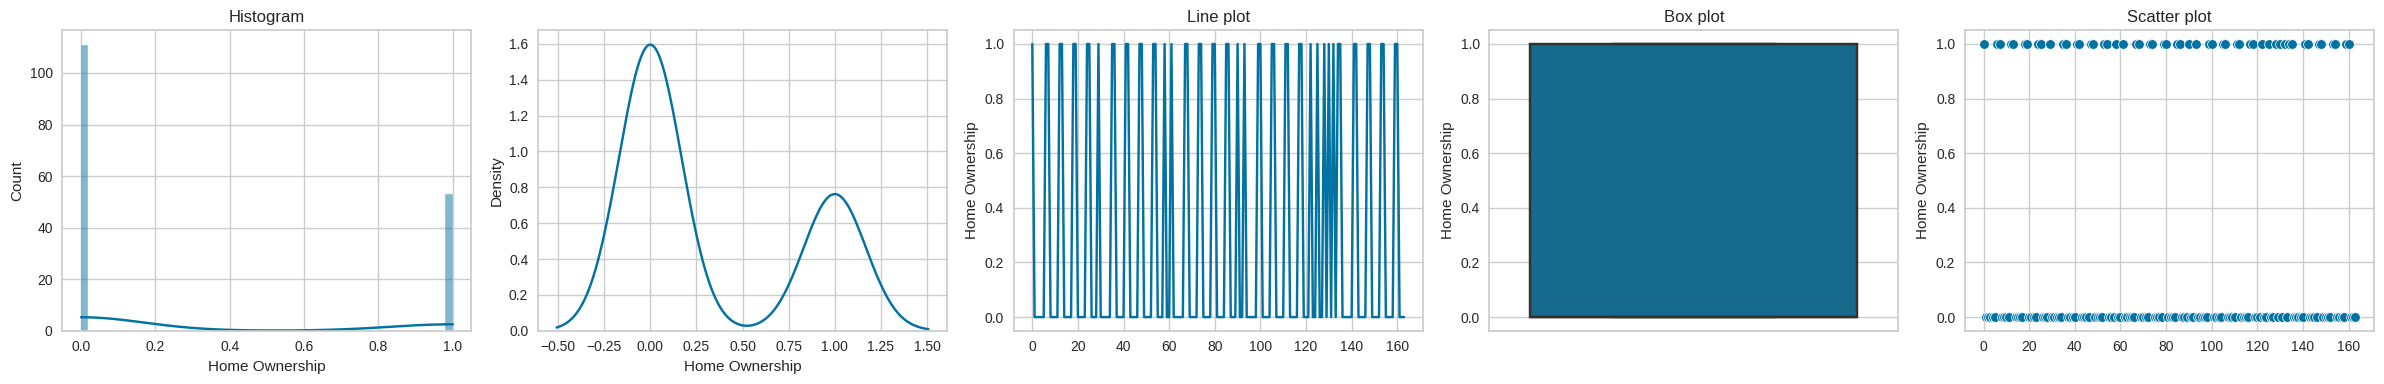

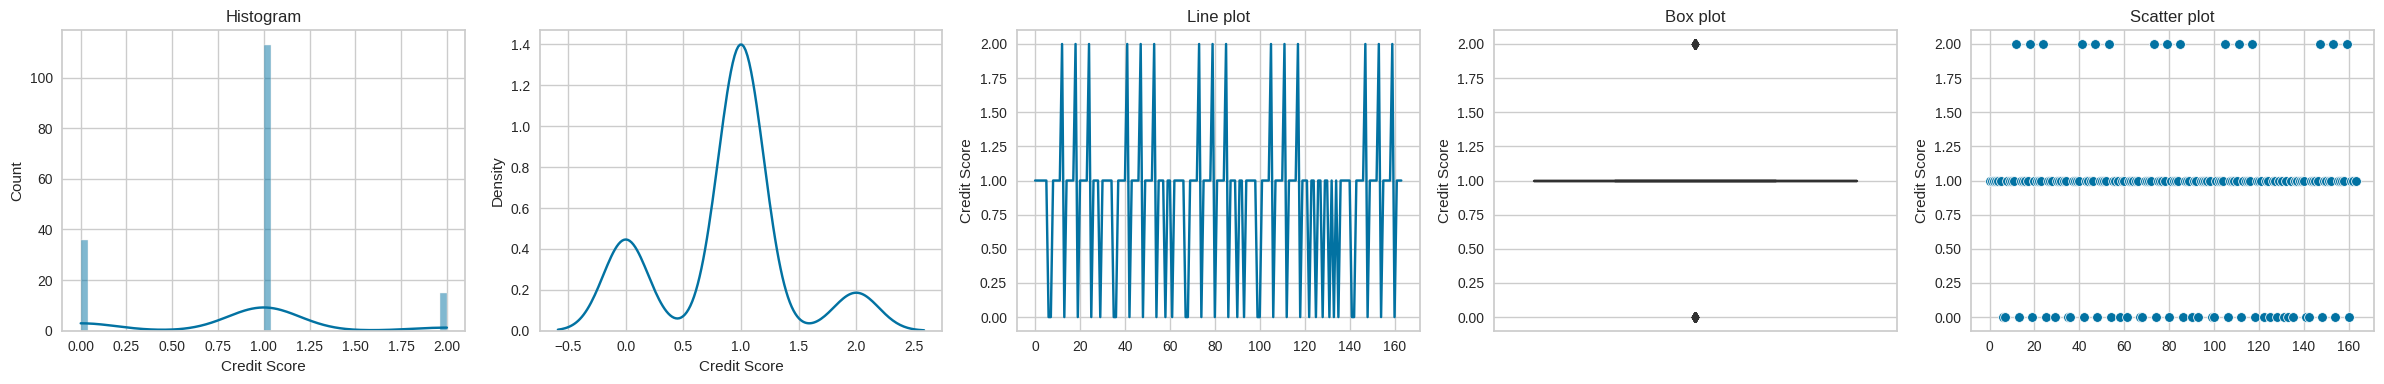

In [ ]:
def plots(cc_data,variable):
  if cc_data[variable].dtype != object:
    fig, ax= plt.subplots(1,5,figsize=(24,4))

    sns.histplot(cc_data[variable],bins=50,kde=True,ax=ax[0])
    ax[0].set_title('Histogram')
    
    sns.kdeplot(cc_data[variable],ax=ax[1])
    ax[2].set_title('Kde Plot')

    sns.lineplot(cc_data[variable],ax=ax[2])
    ax[2].set_title('Line plot')

    sns.boxplot(y=cc_data[variable],ax=ax[3])
    ax[3].set_title('Box plot')

    sns.scatterplot(x=cc_data.index, y=cc_data[variable],ax=ax[4])
    ax[4].set_title('Scatter plot')

    plt.tight_layout()
    plt.show()

for i in cc_data.columns:
  plots(cc_data,i)

In [ ]:
import pandas as pd

train_data=pd.concat([X_train_res,Y_train_res],axis=1)

In [ ]:
from pycaret.classification import *
s=setup(data=train_data,target='Credit Score',session_id=123,normalize=True)

In [ ]:
compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
knn=create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
preds=predict_model(knn)

In [ ]:
preds

Age  Gender  Income  Education  Marital Status  Number of Children  \
140   29       0   47500          0               1                   0   
268   27       0   32785          0               1                   0   
228   27       0   37500          3               1                   0   
205   28       0   32500          0               1                   0   
103   43       1   92500          4               1                   0   
..   ...     ...     ...        ...             ...                 ...   
11    29       0   68000          2               0                   2   
246   28       0   32148          0               1                   0   
238   28       0   32037          0               1                   0   
85    27       0   37500          3               1                   0   
76    50       1  155000          4               0                   0   

     Home Ownership  Credit Score  prediction_label  prediction_score  
140               1             0                 0               1.0  
268               1             2                 2               1.0  
228               1             2                 2               1.0  
205               1             2                 2               1.0  
103               0             1                 1               1.0  
..              ...           ...               ...               ...  
11                0             0                 1               1.0  
246               1             2                 2               1.0  
238               1             2                 2               1.0  
85                1             2                 2               1.0  
76                0             1                 1               1.0  

[81 rows x 10 columns]

In [ ]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(knn,X_train_res,Y_train_res,cv=20)

In [ ]:
preds=predict_model(knn)

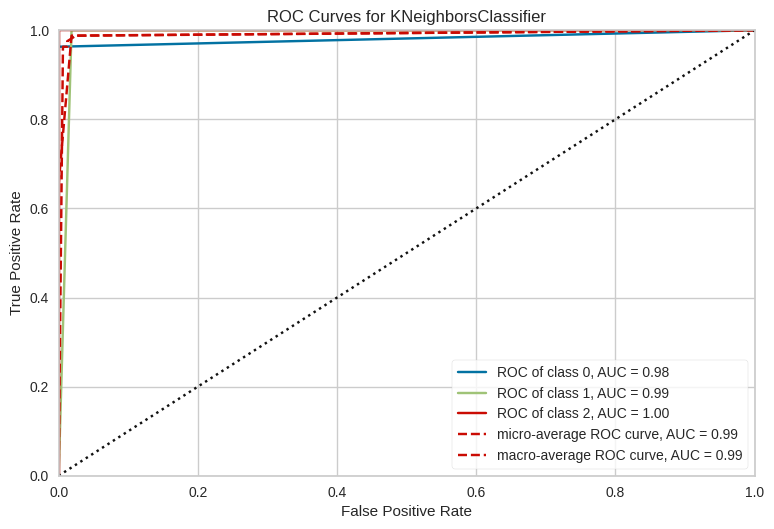

In [ ]:
plot_model(knn)

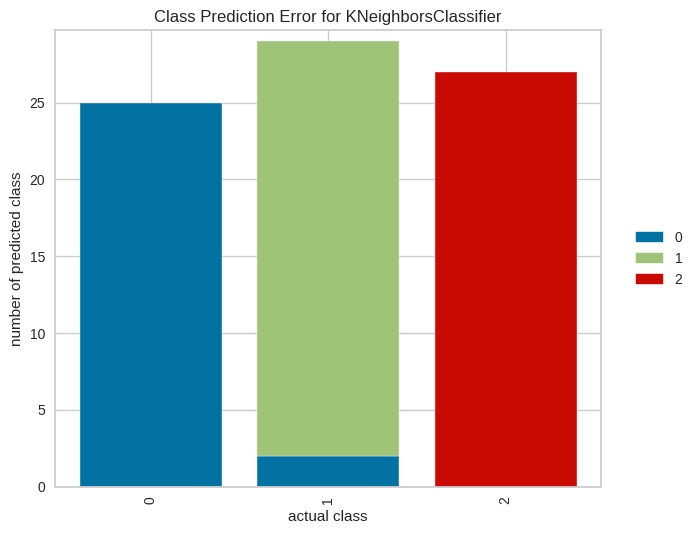

In [ ]:
plot_model(knn,plot='error')

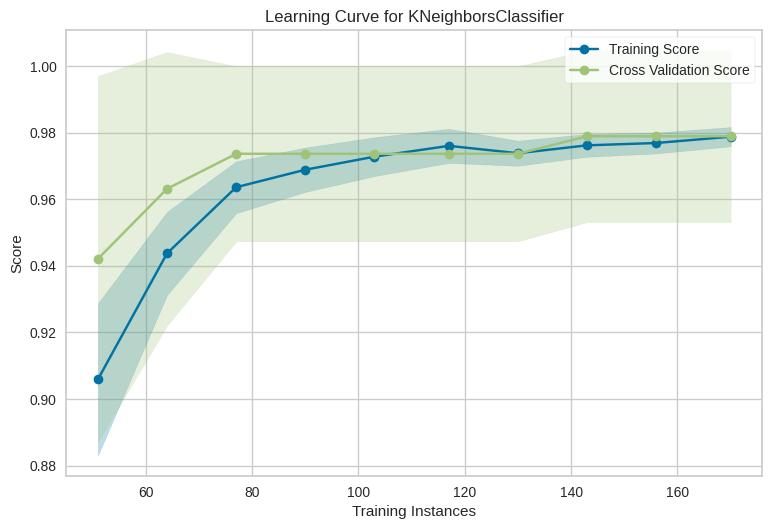

In [ ]:
plot_model(knn,plot ='learning')

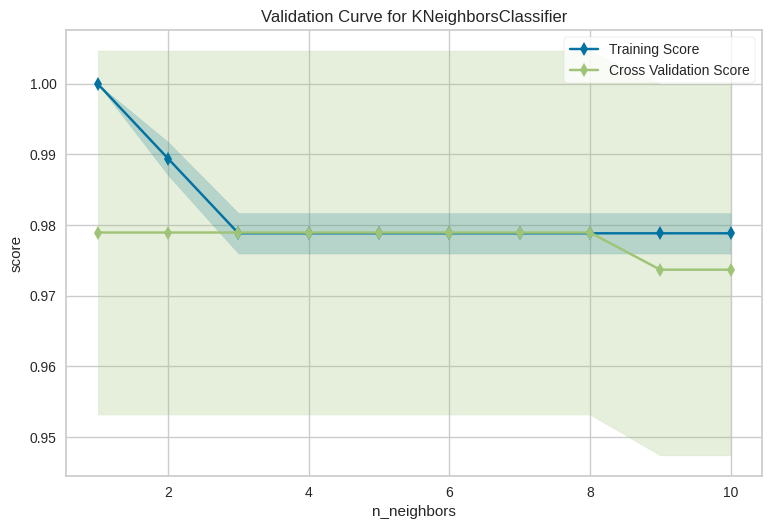

In [ ]:
plot_model(knn,plot='vc')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier()
clf.fit(X_train_res,Y_train_res)
scores=cross_val_score(knn,X_train_res,Y_train_res,cv=20)

Y_preds=clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification_reports")
print(classification_report(Y_test,Y_preds))

Classification_reports
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        23
           2       1.00      1.00      1.00         5

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



In [ ]:
print("Confusion_matrix")
print(confusion_matrix(Y_test,Y_preds))

Confusion_matrix
[[ 5  0  0]
 [ 0 23  0]
 [ 0  0  5]]
